#### (b) Pre-Processing and Exploratory data analysis:
##### i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

In [1]:
import sys
import datetime
from datetime import datetime
from datetime import timedelta
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import string
import re
import math
from math import radians, cos, sin, asin, sqrt
from statistics import mean 
import warnings
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
import itertools
from itertools import islice
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from scipy.io import arff

In [3]:
# Loading Dataset

raw_data_arff = arff.loadarff('Homework 1 Data/vertebral_column_data/column_2C_weka.arff')
raw_data = pd.DataFrame(raw_data_arff[0])
raw_data['class']=raw_data['class'].str.decode("utf-8")
raw_data


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [4]:
raw_data['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

### (b) Pre-Processing and Exploratory data analysis:

### i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

In [5]:
# Copy dataset into new variable

pre_processed_data=raw_data

In [6]:
# Rename class Abnormal to 1 and class Normal to 0

def rename_class(value):
    if value=='Abnormal':
        new_value=1
    else:
        new_value=0
    return new_value

In [7]:
pre_processed_data['renamed_class']=raw_data['class'].apply(rename_class)

In [8]:
pre_processed_data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,renamed_class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal,1
...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal,0


In [9]:
# Drop the unneeded column class
pre_processed_data.drop('class', axis=1, inplace=True)

In [10]:
pre_processed_data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,renamed_class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


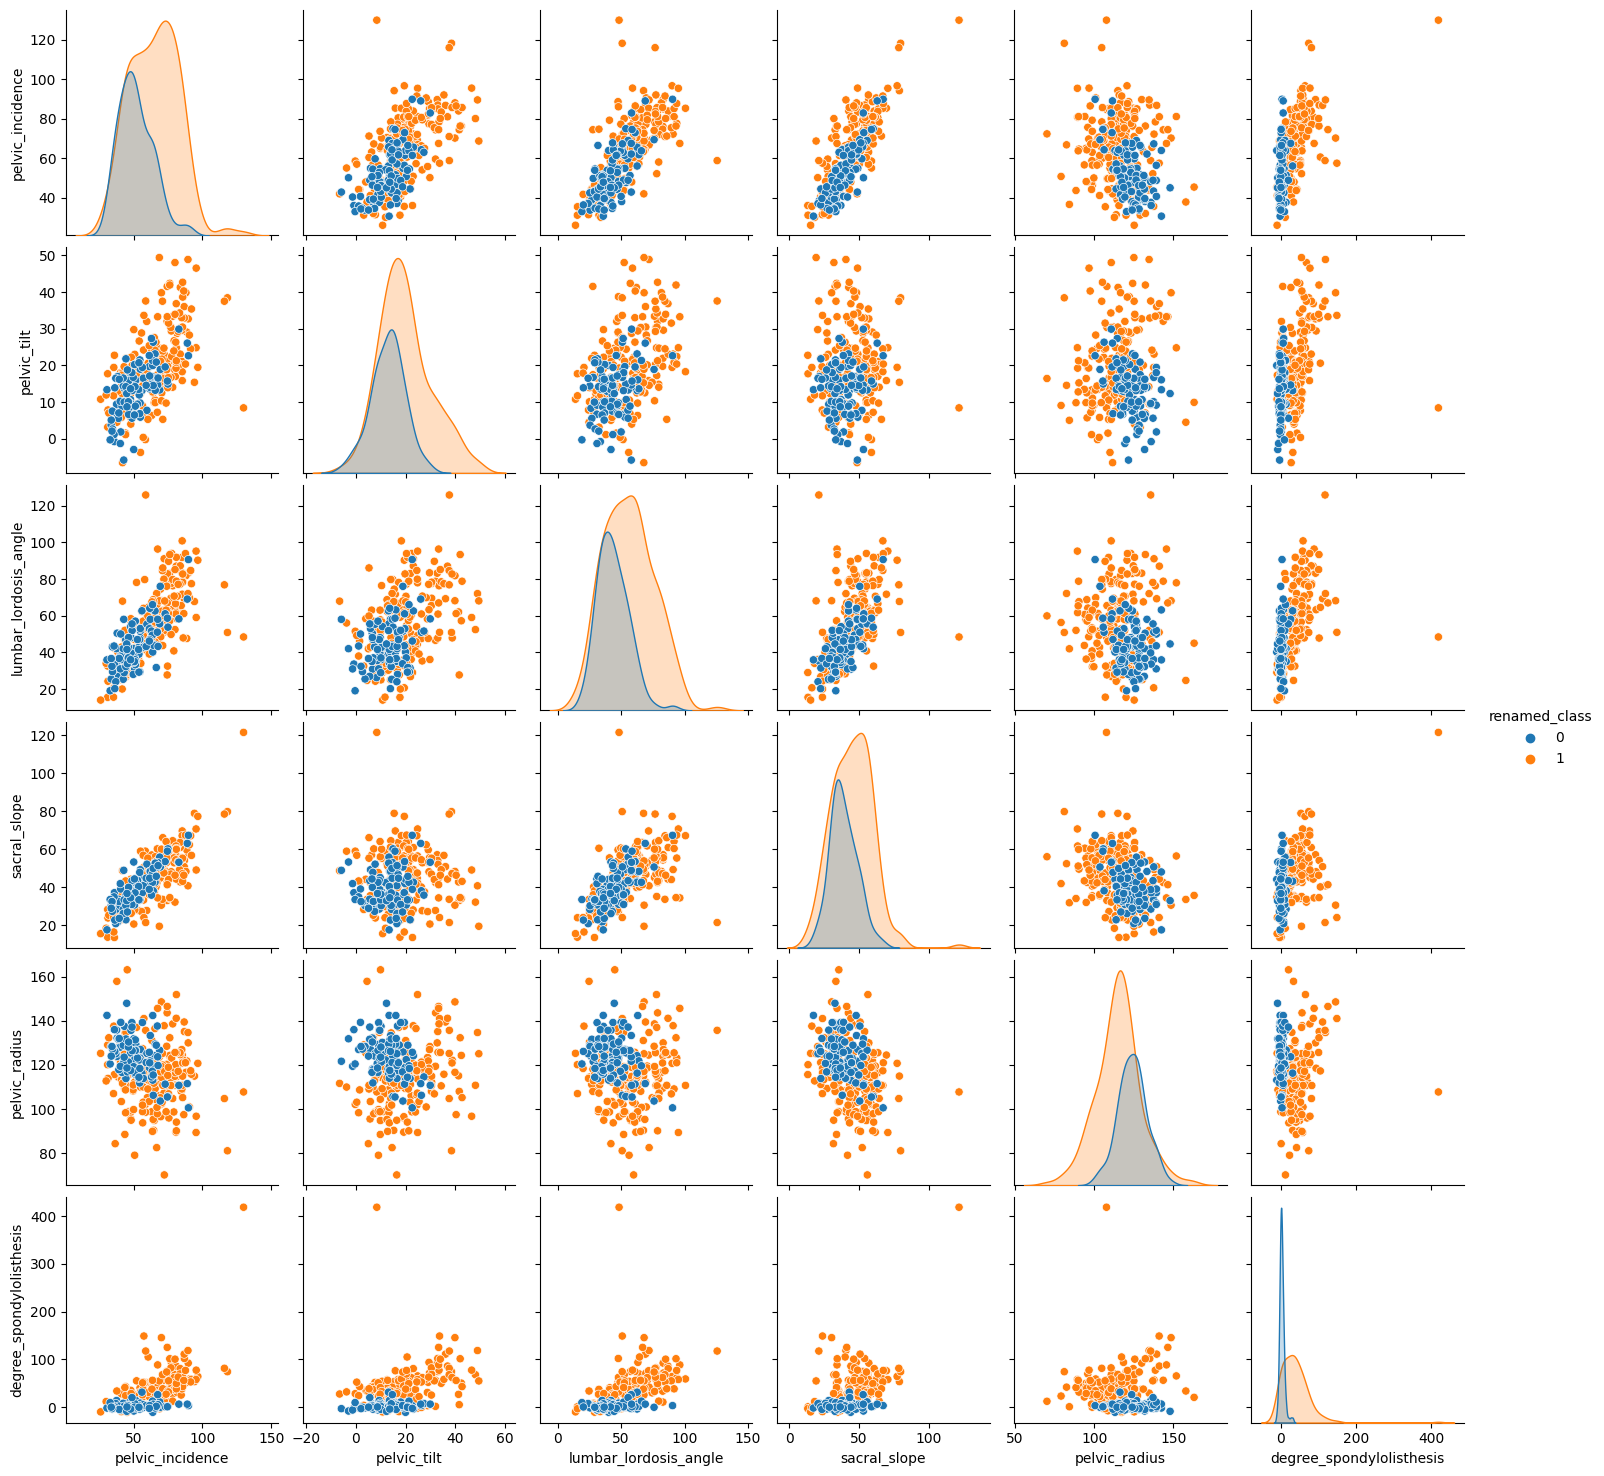

In [11]:
sns.pairplot(pre_processed_data, hue="renamed_class")

### ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1

<AxesSubplot: xlabel='renamed_class', ylabel='pelvic_incidence'>

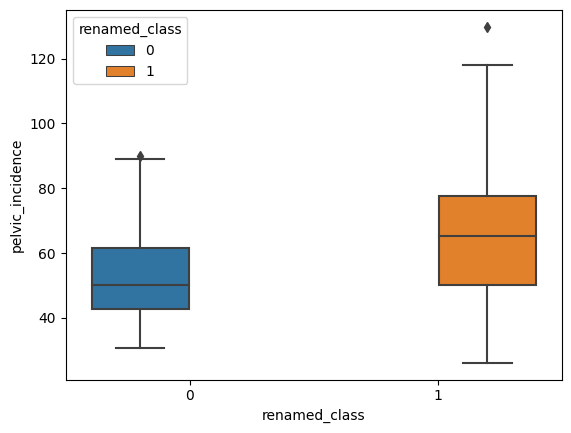

In [12]:
# Question 1 (b)
sns.boxplot(x = 'renamed_class', y = 'pelvic_incidence', data = pre_processed_data, hue = 'renamed_class')

<AxesSubplot: xlabel='renamed_class', ylabel='pelvic_tilt'>

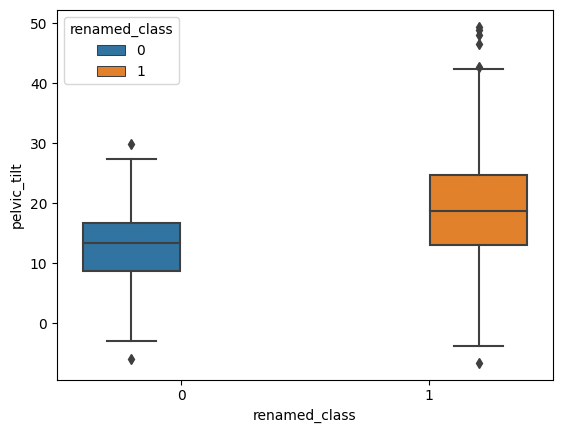

In [13]:
sns.boxplot(x = 'renamed_class', y = 'pelvic_tilt', data = pre_processed_data, hue = 'renamed_class')

<AxesSubplot: xlabel='renamed_class', ylabel='lumbar_lordosis_angle'>

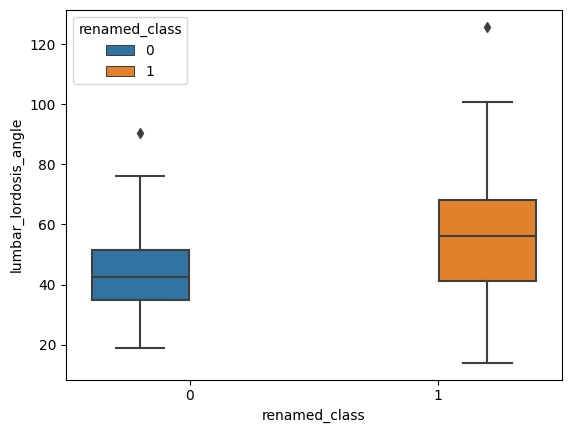

In [14]:
sns.boxplot(x = 'renamed_class', y = 'lumbar_lordosis_angle', data = pre_processed_data, hue = 'renamed_class')

<AxesSubplot: xlabel='renamed_class', ylabel='sacral_slope'>

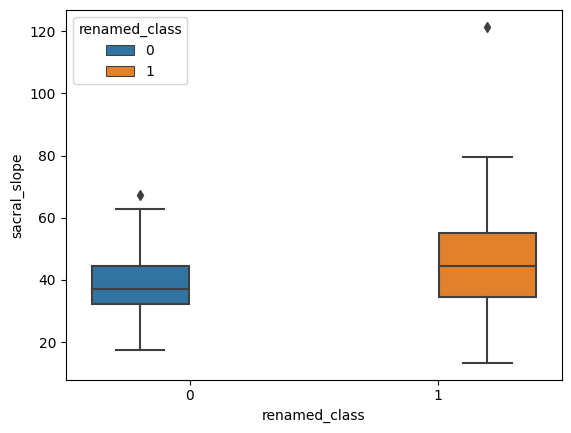

In [15]:
sns.boxplot(x = 'renamed_class', y = 'sacral_slope', data = pre_processed_data, hue = 'renamed_class')

<AxesSubplot: xlabel='renamed_class', ylabel='pelvic_radius'>

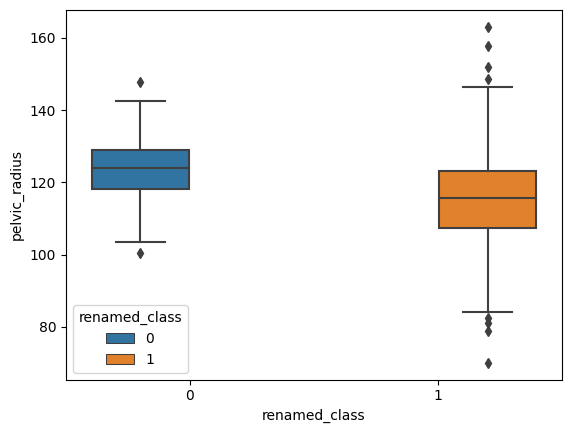

In [16]:
sns.boxplot(x = 'renamed_class', y = 'pelvic_radius', data = pre_processed_data, hue = 'renamed_class')

<AxesSubplot: xlabel='renamed_class', ylabel='degree_spondylolisthesis'>

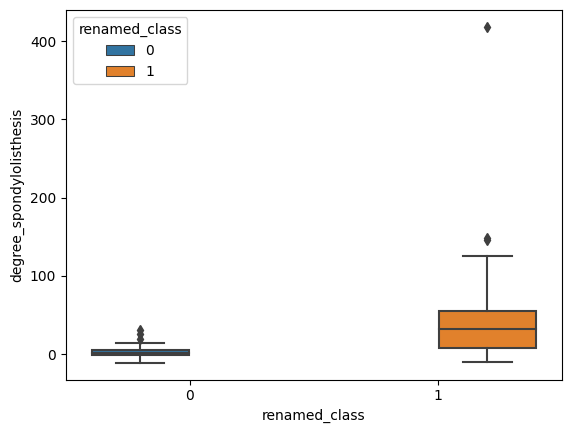

In [17]:
sns.boxplot(x = 'renamed_class', y = 'degree_spondylolisthesis', data = raw_data, hue = 'renamed_class')

### iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [18]:
# Create a df of class 0
Class_0=raw_data.loc[raw_data['renamed_class'] == 0]

In [19]:
Class_0

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,renamed_class
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
211,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
213,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
214,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


In [20]:
# Remove the headers and index from Class 0
Class_0_with_header=Class_0
Class_0_with_header.reset_index(drop=True, inplace=True)

In [21]:
#remove the headers and index
Class_0_with_header.to_csv('Class_0_with_header.csv', header=None, index=False)

In [22]:
Class_0_cleaned=pd.read_csv('Class_0_with_header.csv', index_col=None, header=None)

In [23]:
# Select first 70 rows of class 0 as Training data
Class_0_train=Class_0_cleaned.iloc[:70]

In [24]:
Class_0_train

,0,1,2,3,4,5,6
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0
...,...,...,...,...,...,...,...
65,67.289712,16.717514,51.000000,50.572198,137.591778,4.960344,0
66,51.325464,13.631223,33.258578,37.694240,131.306122,1.788870,0
67,65.756348,13.206926,44.000000,52.549422,129.393573,-1.982120,0
68,40.413366,-1.329412,30.982768,41.742778,119.335655,-6.173675,0


In [25]:
# Select the rest of class 0 as Test data
Class_0_test=Class_0_cleaned.iloc[71:]

In [26]:
Class_0_test

,0,1,2,3,4,5,6
71,64.261507,14.497866,43.902504,49.763642,115.388268,5.951454,0
72,53.683380,13.447022,41.584297,40.236358,113.913703,2.737035,0
73,48.995958,13.113820,51.873520,35.882137,126.398188,0.535472,0
74,59.167612,14.562749,43.199158,44.604863,121.035642,2.830504,0
75,67.804694,16.550662,43.256802,51.254033,119.685645,4.867540,0
76,61.734875,17.114312,46.900000,44.620563,120.920200,3.087726,0
77,33.041688,-0.324678,19.071075,33.366366,120.388611,9.354365,0
78,74.565015,15.724320,58.618582,58.840695,105.417304,0.599247,0
79,44.430701,14.174264,32.243495,30.256437,131.717613,-3.604255,0
80,36.422485,13.879424,20.242562,22.543061,126.076861,0.179717,0


In [27]:
# Create a df of class 1
Class_1=raw_data.loc[raw_data['renamed_class'] == 1]

In [28]:
Class_1

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,renamed_class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
205,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,1
206,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,1
207,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,1
208,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,1


In [29]:
# Remove the headers, index and y data from Class 1
Class_1_with_header=Class_1
Class_1_with_header.reset_index(drop=True, inplace=True)

In [30]:
#remove the headers and index
Class_1_with_header.to_csv('Class_1_with_header.csv', header=None, index=False)

In [31]:
Class_1_cleaned=pd.read_csv('Class_1_with_header.csv', index_col=None, header=None)

In [32]:
# Select first 140 rows of class 1 as Training data
Class_1_train=Class_1_cleaned.iloc[:140]

Class_1_train

,0,1,2,3,4,5,6
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
135,77.121344,30.349874,77.481083,46.771470,110.611148,82.093607,1
136,88.024499,39.844669,81.774473,48.179830,116.601538,56.766083,1
137,83.396606,34.310989,78.423293,49.085617,110.466516,49.672096,1
138,72.054034,24.700737,79.874016,47.353297,107.172358,56.426159,1


In [33]:
# Select the rest of class 1 as Test data
Class_1_test=Class_1_cleaned.iloc[141:]

In [34]:
Class_1_test

,0,1,2,3,4,5,6
141,89.504947,48.903653,72.003423,40.601295,134.634291,118.353370,1
142,85.290173,18.278890,100.744220,67.011283,110.660701,58.884948,1
143,60.626217,20.595958,64.535262,40.030259,117.225554,104.859247,1
144,60.044177,14.309656,58.038865,45.734521,105.131664,30.409133,1
145,85.643787,42.689195,78.750664,42.954592,105.144076,42.887426,1
...,...,...,...,...,...,...,...
205,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,1
206,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,1
207,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,1
208,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,1


In [35]:
# Concatenate the Normal and Abnormal Training datasets to create the training dataset

Training_data=pd.concat([Class_0_train, Class_1_train], axis=0)

In [36]:
Training_data

,0,1,2,3,4,5,6
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0
...,...,...,...,...,...,...,...
135,77.121344,30.349874,77.481083,46.771470,110.611148,82.093607,1
136,88.024499,39.844669,81.774473,48.179830,116.601538,56.766083,1
137,83.396606,34.310989,78.423293,49.085617,110.466516,49.672096,1
138,72.054034,24.700737,79.874016,47.353297,107.172358,56.426159,1


In [37]:
# Concatenate the Normal and Abnormal Testing datasets to create the testing dataset

Testing_data=pd.concat([Class_0_test, Class_1_test], axis=0)

In [38]:
Testing_data

,0,1,2,3,4,5,6
71,64.261507,14.497866,43.902504,49.763642,115.388268,5.951454,0
72,53.683380,13.447022,41.584297,40.236358,113.913703,2.737035,0
73,48.995958,13.113820,51.873520,35.882137,126.398188,0.535472,0
74,59.167612,14.562749,43.199158,44.604863,121.035642,2.830504,0
75,67.804694,16.550662,43.256802,51.254033,119.685645,4.867540,0
...,...,...,...,...,...,...,...
205,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,1
206,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,1
207,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,1
208,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,1


In [43]:
# Shuffle the training data
#Training_data = Training_data.sample(frac = 1)

# Shuffle the testing data
#Testing_data = Testing_data.sample(frac = 1)

In [39]:
# Create X_train, y_train, X_test, y_test
X_train=Training_data.iloc[: , :6].to_numpy()
y_train=Training_data.iloc[: , 6:7].to_numpy().ravel()
X_test=Testing_data.iloc[: , :6].to_numpy()
y_test=Testing_data.iloc[: , 6:7].to_numpy().ravel()

In [40]:
X_train

array([[ 38.50527283,  16.96429691,  35.11281407,  21.54097592,
        127.6328747 ,   7.98668323],
       [ 54.92085752,  18.96842952,  51.60145541,  35.952428  ,
        125.8466462 ,   2.00164247],
       [ 44.36249017,   8.94543489,  46.90209626,  35.41705528,
        129.220682  ,   4.99419529],
       ...,
       [ 83.39660609,  34.31098931,  78.42329287,  49.08561678,
        110.4665164 ,  49.67209559],
       [ 72.05403412,  24.70073725,  79.87401586,  47.35329687,
        107.1723576 ,  56.42615873],
       [ 85.09550254,  21.06989651,  91.73479193,  64.02560604,
        109.062312  ,  38.03283108]])

In [267]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [42]:
X_test

array([[ 64.26150724,  14.49786554,  43.90250363,  49.76364169,
        115.3882683 ,   5.95145437],
       [ 53.68337998,  13.44702168,  41.58429713,  40.23635831,
        113.9137026 ,   2.73703529],
       [ 48.99595771,  13.11382047,  51.87351997,  35.88213725,
        126.3981876 ,   0.53547162],
       [ 59.16761171,  14.56274875,  43.19915768,  44.60486296,
        121.0356423 ,   2.83050412],
       [ 67.80469442,  16.55066167,  43.25680184,  51.25403274,
        119.6856451 ,   4.86753994],
       [ 61.73487533,  17.11431203,  46.89999999,  44.6205633 ,
        120.9201997 ,   3.087726  ],
       [ 33.04168754,  -0.32467846,  19.0710746 ,  33.366366  ,
        120.3886112 ,   9.35436493],
       [ 74.56501543,  15.72431994,  58.61858244,  58.84069549,
        105.417304  ,   0.59924711],
       [ 44.43070103,  14.17426387,  32.2434952 ,  30.25643716,
        131.7176127 ,  -3.60425534],
       [ 36.42248549,  13.87942449,  20.24256187,  22.543061  ,
        126.0768612 ,   0.1

In [43]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### (c) Classification using KNN on Vertebral Column Data Set

i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).


In [44]:
#Training

# When Power parameter for the Minkowski metric p=2 this is equivalent to using euclidean distance
KNN_model_p2 = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski').fit(X_train, y_train)

In [45]:
#Predict
y_pred_test = KNN_model_p2.predict(X_test)

#Perfromance Evaluation
test_score = accuracy_score(y_test, y_pred_test)*100

In [46]:
test_score 

87.75510204081633

ii. Test all the data in the test database with k nearest neighbors. Take de- cisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Cal- culate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗.2

In [253]:
# Create a function that takes value of k and returns k, train_error, test_error

def get_error(k, x_trainf, y_trainf):
    
    # Train
    KNN_model_findk = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski').fit(x_trainf, y_trainf)
    
    #Predict
    y_pred_test = KNN_model_findk.predict(X_test)
    y_pred_train = KNN_model_findk.predict(x_trainf)

    #Perfromance Evaluation
    test_score = accuracy_score(y_test, y_pred_test)
    train_score=accuracy_score(y_trainf, y_pred_train)
    
    test_error=1-test_score
    train_error=1-train_score
    
    return [k, test_error, train_error]
    
    

In [254]:
k_range=list(range(1,209))
k_result_dict=dict.fromkeys(k_range)

In [255]:
k_result_dict

{1: None,
 2: None,
 3: None,
 4: None,
 5: None,
 6: None,
 7: None,
 8: None,
 9: None,
 10: None,
 11: None,
 12: None,
 13: None,
 14: None,
 15: None,
 16: None,
 17: None,
 18: None,
 19: None,
 20: None,
 21: None,
 22: None,
 23: None,
 24: None,
 25: None,
 26: None,
 27: None,
 28: None,
 29: None,
 30: None,
 31: None,
 32: None,
 33: None,
 34: None,
 35: None,
 36: None,
 37: None,
 38: None,
 39: None,
 40: None,
 41: None,
 42: None,
 43: None,
 44: None,
 45: None,
 46: None,
 47: None,
 48: None,
 49: None,
 50: None,
 51: None,
 52: None,
 53: None,
 54: None,
 55: None,
 56: None,
 57: None,
 58: None,
 59: None,
 60: None,
 61: None,
 62: None,
 63: None,
 64: None,
 65: None,
 66: None,
 67: None,
 68: None,
 69: None,
 70: None,
 71: None,
 72: None,
 73: None,
 74: None,
 75: None,
 76: None,
 77: None,
 78: None,
 79: None,
 80: None,
 81: None,
 82: None,
 83: None,
 84: None,
 85: None,
 86: None,
 87: None,
 88: None,
 89: None,
 90: None,
 91: None,
 92: Non

In [256]:
for k_value in k_result_dict.keys():
    
    k_result_dict[k_value]=get_error(k_value, X_train, y_train)
    

In [257]:
k_result_dict

{1: [1, 0.12244897959183676, 0.0],
 2: [2, 0.10204081632653061, 0.11428571428571432],
 3: [3, 0.0714285714285714, 0.10476190476190472],
 4: [4, 0.061224489795918324, 0.1428571428571429],
 5: [5, 0.09183673469387754, 0.14761904761904765],
 6: [6, 0.0714285714285714, 0.14761904761904765],
 7: [7, 0.11224489795918369, 0.1428571428571429],
 8: [8, 0.0714285714285714, 0.1333333333333333],
 9: [9, 0.12244897959183676, 0.1428571428571429],
 10: [10, 0.09183673469387754, 0.1333333333333333],
 11: [11, 0.11224489795918369, 0.14761904761904765],
 12: [12, 0.09183673469387754, 0.1523809523809524],
 13: [13, 0.11224489795918369, 0.1428571428571429],
 14: [14, 0.09183673469387754, 0.1428571428571429],
 15: [15, 0.10204081632653061, 0.1428571428571429],
 16: [16, 0.08163265306122447, 0.15714285714285714],
 17: [17, 0.10204081632653061, 0.1523809523809524],
 18: [18, 0.11224489795918369, 0.14761904761904765],
 19: [19, 0.11224489795918369, 0.14761904761904765],
 20: [20, 0.10204081632653061, 0.152380

In [258]:
k_result_df=pd.DataFrame.from_dict(k_result_dict, orient='index', columns=['k', 'test_error', 'train_error'])

In [259]:
k_result_df

,k,test_error,train_error
1,1,0.122449,0.000000
2,2,0.102041,0.114286
3,3,0.071429,0.104762
4,4,0.061224,0.142857
5,5,0.091837,0.147619
...,...,...,...
204,204,0.295918,0.333333
205,205,0.295918,0.333333
206,206,0.295918,0.333333
207,207,0.295918,0.333333


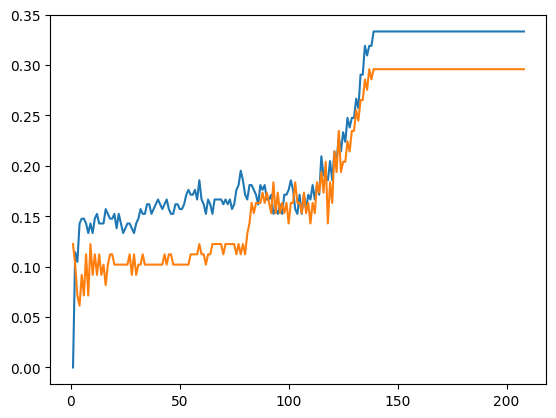

In [260]:
plt.plot(k_result_df['k'],k_result_df['train_error'], k_result_df['test_error'] )


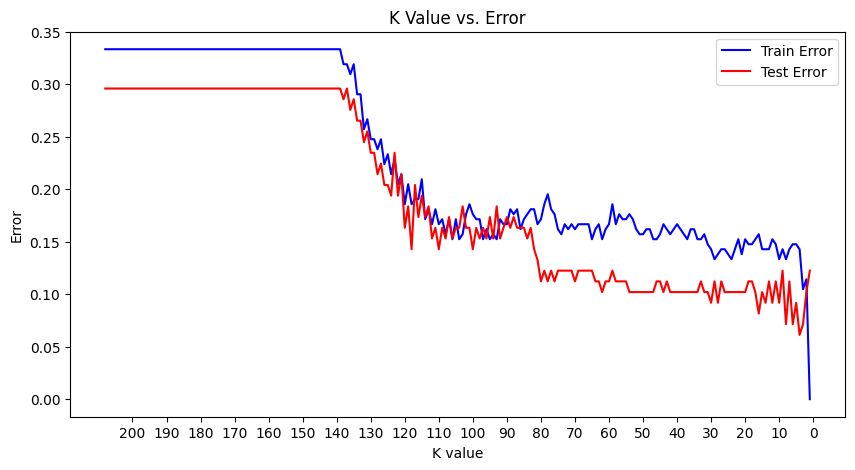

In [261]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(k_result_df['k'],k_result_df['train_error'], color='blue', label='Train Error')
ax.plot(k_result_df['k'],k_result_df['test_error'], color='red', label='Test Error')

ax.set_xticks(np.arange(0, 210, 10))
#locs, labels = yticks() 
#yticks(np.arange(0, 1, step=0.2))
ax.set_yticks(np.arange(0, 0.4, step=0.05))
#ax.set_xticks(ax.get_xticks()[::1]) 
ax.invert_xaxis()
ax.set_xlabel('K value')
ax.set_ylabel('Error')
ax.set_title('K Value vs. Error')
ax.legend()

In [262]:
# Getting the most suitable k

#best_k=k_result_df[k_result_df['k']==]
best_k=k_result_df[k_result_df['test_error']==k_result_df['test_error'].min()]

In [263]:
best_k

,k,test_error,train_error
4,4,0.061224,0.142857


In [58]:
# Get classification report for best k

best_k_value=int(best_k['k'])
best_k_value

4

In [59]:
#Train using best k
KNN_model_best = KNeighborsClassifier(n_neighbors=best_k_value, p=2, metric='minkowski').fit(X_train, y_train)

#Predict
y_pred_test_best = KNN_model_best.predict(X_test)

#Perfromance Evaluation
test_score_best = accuracy_score(y_test, y_pred_test_best)*100

In [264]:
test_score_best

93.87755102040816

In [61]:
print(classification_report(y_test,y_pred_test_best))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        29
           1       0.93      0.99      0.96        69

    accuracy                           0.94        98
   macro avg       0.95      0.91      0.92        98
weighted avg       0.94      0.94      0.94        98



In [62]:
cm = confusion_matrix(y_test,y_pred_test_best)
cm

array([[24,  5],
       [ 1, 68]])

In [293]:
TPR = cm[0,0] / (cm[0,0]+cm[0,1])
print("True postive rate:")
print(TPR)
TNR = cm[1,1] / (cm[1,0]+cm[1,1])
print("True negative rate:")
print(TNR)

True postive rate:
0.8275862068965517
True negative rate:
0.9855072463768116


iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate,3 which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10,20,30,...,210}.4 Note: for each N, select your training set by choosing the first ⌊N/3⌋ rows of Class 0 and the first N − ⌊N/3⌋ rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1,6,11,...,196}. This plot is called a Learning Curve.

In [63]:
# Create a function to choose an N subset of the trainig set given value of N

def select_data_subset(N):
    
    #Training_set
    #choose the first ⌊N/3⌋ rows of Class 0
    limit_0=int(N / 3)
    Class_0_train_subset=Class_0_train.iloc[:limit_0]
    
    #choose the first N − ⌊N/3⌋ rows of Class 1
    limit_1=N - int(N / 3)
    Class_1_train_subset=Class_1_train.iloc[:limit_1]
    
    Training_data_subset=pd.concat([Class_1_train_subset, Class_0_train_subset], axis=0)
    Training_data_subset.reset_index(drop=True, inplace=True)
    
    #Testing_set
    Class_0_test_subset=Class_0_test
    
    Class_1_test_subset=Class_1_test
    
    Testing_data_subset=pd.concat([Class_0_test_subset, Class_1_test_subset], axis=0)
    Testing_data_subset.reset_index(drop=True, inplace=True)
    
    
    # Create X_train, y_train, X_test, y_test
    X_train_subset=Training_data_subset.iloc[: , :6].to_numpy()
    y_train_subset=Training_data_subset.iloc[: , 6:7].to_numpy().ravel()
    X_test_subset=Testing_data_subset.iloc[: , :6].to_numpy()
    y_test_subset=Testing_data_subset.iloc[: , 6:7].to_numpy().ravel()
    
    return X_train_subset, y_train_subset, X_test_subset, y_test_subset
    
    
    
    

In [64]:
# Create a function that takes value of N and returns the K_result_test_error_dictionary

def create_k_dictionary(N):
    
    k_range=list(range(1,N,5))
    k_result_dict=dict.fromkeys(k_range)

    
    #k_range_N=list(range(1,N,5))
    #k_range_N_df=pd.DataFrame(k_range_N, columns=['k'])
    #k_range_N_df.reset_index(drop=True, inplace=True)
    
    return k_result_dict
    

In [274]:
# Create range of N ∈ {10,20,30,...,210}
N_range=list(range(10,220,10))

N_result_df=pd.DataFrame(N_range, columns=['N'])
N_result_df.reset_index(drop=True, inplace=True)

In [273]:
def get_test_error_rate(N):
    
    
    # Choose n subset of dataset
    X_train_s, y_train_s, X_test_s, y_test_s=select_data_subset(N)
    
    # find values of k to loop through
    k_dict_s=create_k_dictionary(N)
    
    #get training and test errors
    #k_df_s[['train_error','test_error']]=k_df_s['k'].apply(get_error)
    
    for k_value in k_dict_s.keys():
        k_dict_s[k_value]=get_error(k_value, X_train_s, y_train_s)
    
    k_df_s=pd.DataFrame.from_dict(k_dict_s, orient='index', columns=['k', 'test_error', 'train_error'])
    
    # get best k and best training and test error
    best_k_s=k_df_s[k_df_s['test_error']==k_df_s['test_error'].min()]
    best_k_s.reset_index(drop=True, inplace=True)
    
    best_k= best_k_s.iloc[0]['k']
    best_train_error=best_k_s.iloc[0]['train_error']
    best_test_error=best_k_s.iloc[0]['test_error']
    
    del X_train_s, y_train_s, X_test_s, y_test_s, k_df_s, best_k_s
    
    return pd.Series([best_k, best_train_error, best_test_error])    

In [275]:
N_result_df[['K', 'train_error', 'test_error']] = N_result_df['N'].apply(get_test_error_rate)

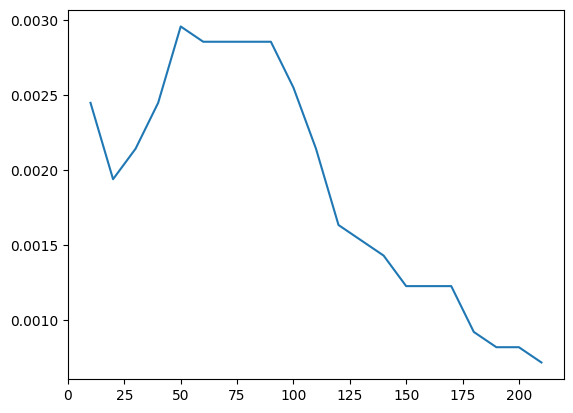

In [276]:
plt.plot(N_result_df['N'], N_result_df['test_error']/100, label='Best Error Rate')

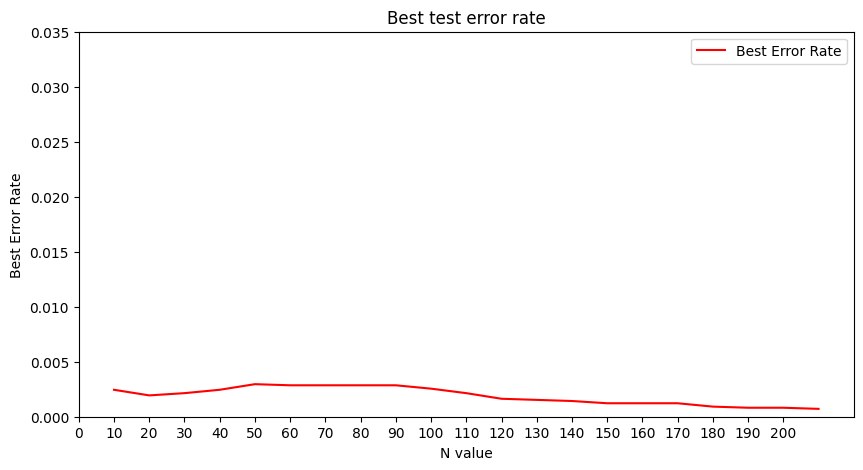

In [279]:
fig2, ax2 = plt.subplots(1, 1, figsize=(10, 5))

ax2.plot(N_result_df['N'],N_result_df['test_error']/100, color='red', label='Best Error Rate')


ax2.set_xticks(np.arange(0, 210, 10))
#locs, labels = yticks() 
#yticks(np.arange(0, 1, step=0.2))
ax2.set_yticks(np.arange(0, 0.04, step=0.005))
#ax.set_xticks(ax.get_xticks()[::1]) 
ax2.set_xlabel('N value')
ax2.set_ylabel('Best Error Rate')
ax2.set_title('Best test error rate')
ax2.legend()

In [278]:
N_result_df

,N,K,train_error,test_error
0,10,1.0,0.000000,0.244898
1,20,6.0,0.150000,0.193878
2,30,1.0,0.000000,0.214286
3,40,11.0,0.200000,0.244898
4,50,26.0,0.320000,0.295918
5,60,21.0,0.266667,0.285714
6,70,26.0,0.271429,0.285714
7,80,31.0,0.300000,0.285714
8,90,41.0,0.300000,0.285714
9,100,6.0,0.180000,0.255102


d) Replace the Euclidean metric with the following metrics5 and test them. Sum-marize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1,6,11,...,196}.
* i. Minkowski Distance:
*   A. which becomes Manhattan Distance with p = 1.

In [283]:
def get_error_manhatten(p,k, x_trainf, y_trainf):
    
    # Train
    KNN_model_findk = KNeighborsClassifier(n_neighbors=k, p=p).fit(x_trainf, y_trainf)
    
    #Predict
    y_pred_test = KNN_model_findk.predict(X_test)
    y_pred_train = KNN_model_findk.predict(x_trainf)

    #Perfromance Evaluation
    test_score = accuracy_score(y_test, y_pred_test)
    train_score=accuracy_score(y_trainf, y_pred_train)
    
    test_error=1-test_score
    train_error=1-train_score
    
    return [test_error, train_error]

In [284]:
# find values of k to loop through
k_dict_s2=create_k_dictionary(201)

for k_value in k_dict_s2.keys():
        k_dict_s2[k_value]=get_error_manhatten(1, k_value, X_train, y_train)

In [285]:
k_dict_s2

{1: [0.11224489795918369, 0.0],
 6: [0.11224489795918369, 0.13809523809523805],
 11: [0.10204081632653061, 0.1428571428571429],
 16: [0.12244897959183676, 0.1333333333333333],
 21: [0.12244897959183676, 0.14761904761904765],
 26: [0.11224489795918369, 0.16666666666666663],
 31: [0.11224489795918369, 0.16666666666666663],
 36: [0.12244897959183676, 0.16190476190476188],
 41: [0.12244897959183676, 0.16666666666666663],
 46: [0.12244897959183676, 0.17142857142857137],
 51: [0.13265306122448983, 0.17142857142857137],
 56: [0.12244897959183676, 0.18571428571428572],
 61: [0.1428571428571429, 0.17619047619047623],
 66: [0.1428571428571429, 0.18571428571428572],
 71: [0.13265306122448983, 0.17619047619047623],
 76: [0.13265306122448983, 0.18095238095238098],
 81: [0.15306122448979587, 0.16666666666666663],
 86: [0.1428571428571429, 0.1523809523809524],
 91: [0.19387755102040816, 0.17619047619047623],
 96: [0.19387755102040816, 0.17619047619047623],
 101: [0.2142857142857143, 0.199999999999999

In [286]:
k_df_Manhatten=pd.DataFrame(k_dict_s2).transpose().reset_index()
k_df_Manhatten.to_csv('k_df_Manhatten.csv', header=None, index=False)
k_df_Manhatten=pd.read_csv('k_df_Manhatten.csv', index_col=None, header=None, names=['k', 'test_error', 'train_error'])
#k_df_Manhatten.reset_index(drop=True, inplace=True)

In [287]:
k_df_Manhatten

,k,test_error,train_error
0,1,0.112245,0.000000
1,6,0.112245,0.138095
2,11,0.102041,0.142857
3,16,0.122449,0.133333
4,21,0.122449,0.147619
5,26,0.112245,0.166667
6,31,0.112245,0.166667
7,36,0.122449,0.161905
8,41,0.122449,0.166667
9,46,0.122449,0.171429


In [294]:
# get best k and best training and test error
best_k_Manhatten=k_df_Manhatten[k_df_Manhatten['test_error']==k_df_Manhatten['test_error'].min()]
best_k_Manhatten.reset_index(drop=True, inplace=True)

best_k_Manhatten_value= int(best_k_Manhatten.iloc[0]['k'])

In [295]:
best_k_Manhatten_value  

11

In [296]:
# Get best score and best test error for best k
best_score= 1-(float(best_k_Manhatten.iloc[0]['test_error'])/100)
best_score

0.9989795918367347

In [297]:
best_test_error=(float(best_k_Manhatten.iloc[0]['test_error'])/100)
best_test_error

0.001020408163265306

B. with log10(p) ∈ {0.1,0.2,0.3,...,1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?
* C. which becomes Chebyshev Distance with p → ∞ ii. Mahalanobis Distance.6

In [298]:
# find values of p to loop through

log_p_range=[x / 10.0 for x in range(1, 11, 1)]
p_range=[]

for log_value in log_p_range:
    p=10**log_value
    p_range.append(p)


In [299]:
p_range

[1.2589254117941673,
 1.5848931924611136,
 1.9952623149688795,
 2.51188643150958,
 3.1622776601683795,
 3.9810717055349722,
 5.011872336272722,
 6.309573444801933,
 7.943282347242816,
 10.0]

In [300]:
p_result_dict=dict.fromkeys(log_p_range)

In [301]:
i=0
for p_value in p_range:
        log_p_value=log_p_range[i]
        p_result_dict[log_p_value]=get_error_manhatten(p_value, best_k_Manhatten_value, X_train, y_train)
        i+=1

In [302]:
p_result_dict

{0.1: [0.10204081632653061, 0.12857142857142856],
 0.2: [0.10204081632653061, 0.13809523809523805],
 0.3: [0.11224489795918369, 0.14761904761904765],
 0.4: [0.11224489795918369, 0.14761904761904765],
 0.5: [0.11224489795918369, 0.16666666666666663],
 0.6: [0.11224489795918369, 0.16190476190476188],
 0.7: [0.11224489795918369, 0.17619047619047623],
 0.8: [0.10204081632653061, 0.17142857142857137],
 0.9: [0.10204081632653061, 0.18095238095238098],
 1.0: [0.10204081632653061, 0.16190476190476188]}

In [303]:
p_df_Manhatten=pd.DataFrame(p_result_dict).transpose().reset_index()
p_df_Manhatten.to_csv('p_df_Manhatten.csv', header=None, index=False)
p_df_Manhatten=pd.read_csv('p_df_Manhatten.csv', index_col=None, header=None, names=['logp', 'test_error', 'train_error'])
#k_df_Manhatten.reset_index(drop=True, inplace=True)


In [304]:
p_df_Manhatten

,logp,test_error,train_error
0,0.1,0.102041,0.128571
1,0.2,0.102041,0.138095
2,0.3,0.112245,0.147619
3,0.4,0.112245,0.147619
4,0.5,0.112245,0.166667
5,0.6,0.112245,0.161905
6,0.7,0.112245,0.176190
7,0.8,0.102041,0.171429
8,0.9,0.102041,0.180952
9,1.0,0.102041,0.161905


In [305]:
# get best p and best training and test error
best_p_Manhatten=p_df_Manhatten[p_df_Manhatten['test_error']==p_df_Manhatten['test_error'].min()]
best_p_Manhatten.reset_index(drop=True, inplace=True)

best_logp_Manhatten_value= best_p_Manhatten.iloc[0]['logp']
best_logp_error=best_p_Manhatten.iloc[0]['test_error']/100
best_logp_score=1-best_logp_error

In [233]:
best_logp_Manhatten_value

0.1

In [234]:
best_logp_error

0.10204081632653056

In [236]:
best_logp_score

0.8979591836734695

C. which becomes Chebyshev Distance with p → ∞

In [306]:
# find values of k to loop through
k_chebychev=create_k_dictionary(201)

for k_value in k_chebychev.keys():
        k_chebychev[k_value]=get_error_manhatten(float('inf'), k_value, X_train, y_train)

In [307]:
k_df_chebychev=pd.DataFrame(k_chebychev).transpose().reset_index()
k_df_chebychev.to_csv('k_df_chebychev.csv', header=None, index=False)
k_df_chebychev=pd.read_csv('k_df_chebychev.csv', index_col=None, header=None, names=['k', 'test_error', 'train_error'])
#k_df_Manhatten.reset_index(drop=True, inplace=True)

In [308]:
k_df_chebychev

,k,test_error,train_error
0,1,0.122449,0.000000
1,6,0.091837,0.152381
2,11,0.112245,0.161905
3,16,0.071429,0.147619
4,21,0.102041,0.133333
5,26,0.112245,0.157143
6,31,0.112245,0.142857
7,36,0.102041,0.157143
8,41,0.122449,0.142857
9,46,0.112245,0.161905


In [309]:
# get best k and best training and test error
best_k_Chebychev=k_df_chebychev[k_df_chebychev['test_error']==k_df_chebychev['test_error'].min()]
best_k_Chebychev.reset_index(drop=True, inplace=True)

best_k_Chebychev_value= int(best_k_Chebychev.iloc[0]['k'])

In [310]:
best_k_Chebychev_value

16

In [314]:
best_k_Chebychev_test_error=best_k_Chebychev.iloc[0]['test_error']
best_k_Chebychev_score=1-best_k_Chebychev_test_error

In [315]:
best_k_Chebychev_test_error

0.0714285714285714

In [316]:
best_k_Chebychev_score

0.9285714285714286

ii. Mahalanobis Distance

In [145]:
# inverting the covariance matrix of the data
X_train_df=pd.DataFrame(X_train)
M_paramter=X_train_df.cov()

# transform into a reduced feature set in the linear subspace

M_parameterI=np.linalg.pinv(M_paramter)


In [324]:
def get_error_mahalanobis(k, x_trainf, y_trainf):
    
    # Train
    KNN_model_findk = KNeighborsClassifier(n_neighbors=k,metric = 'mahalanobis',metric_params={'VI': M_parameterI}).fit(x_trainf, y_trainf)
    
    #Predict
    y_pred_test = KNN_model_findk.predict(X_test)
    y_pred_train = KNN_model_findk.predict(x_trainf)

    #Perfromance Evaluation
    test_score = accuracy_score(y_test, y_pred_test)
    train_score=accuracy_score(y_trainf, y_pred_train)
    
    test_error=1-test_score
    train_error=1-train_score
    
    return [test_error, train_error]

In [325]:
# find values of k to loop through
k_mahalanobis=create_k_dictionary(201)

for k_value in k_mahalanobis.keys():
        k_mahalanobis[k_value]=get_error_mahalanobis(k_value, X_train, y_train)

In [326]:
k_df_mahalanobis=pd.DataFrame(k_mahalanobis).transpose().reset_index()
k_df_mahalanobis.to_csv('k_df_mahalanobis.csv', header=None, index=False)
k_df_mahalanobis=pd.read_csv('k_df_mahalanobis.csv', index_col=None, header=None, names=['k', 'test_error', 'train_error'])
#k_df_Manhatten.reset_index(drop=True, inplace=True)

In [327]:
k_df_mahalanobis

,k,test_error,train_error
0,1,0.142857,0.000000
1,6,0.153061,0.138095
2,11,0.173469,0.157143
3,16,0.163265,0.152381
4,21,0.193878,0.161905
5,26,0.163265,0.161905
6,31,0.204082,0.171429
7,36,0.204082,0.171429
8,41,0.183673,0.185714
9,46,0.214286,0.185714


In [328]:
# get best k and best training and test error
best_k_mahalanobis=k_df_mahalanobis[k_df_mahalanobis['test_error']==k_df_mahalanobis['test_error'].min()]
best_k_mahalanobis.reset_index(drop=True, inplace=True)

best_k_mahalanobis_value= int(best_k_mahalanobis.iloc[0]['k'])
best_k_mahalanobis_test_error=best_k_mahalanobis.iloc[0]['test_error']
best_k_mahalanobis_score=1-best_k_mahalanobis_test_error

In [329]:
best_k_mahalanobis_value

1

In [330]:
best_k_mahalanobis_test_error

0.1428571428571429

In [331]:
best_k_mahalanobis_score

0.8571428571428571

(e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16,...,196}.

Manhatten

In [333]:
def get_error_manhatten_weighted(k, x_trainf, y_trainf):
    
    # Train
    KNN_model_findk = KNeighborsClassifier(n_neighbors=k, p=1, weights = 'distance').fit(x_trainf, y_trainf)
    
    #Predict
    y_pred_test = KNN_model_findk.predict(X_test)
    y_pred_train = KNN_model_findk.predict(x_trainf)

    #Perfromance Evaluation
    test_score = accuracy_score(y_test, y_pred_test)
    train_score=accuracy_score(y_trainf, y_pred_train)
    
    test_error=1-test_score
    train_error=1-train_score
    
    return [k, test_error, train_error]

In [334]:
# find values of k to loop through
k_manhatten_weighted=create_k_dictionary(201)

for k_value in k_manhatten_weighted.keys():
        k_manhatten_weighted[k_value]=get_error_manhatten_weighted(k_value, X_train, y_train)

In [335]:
k_manhatten_weighted=pd.DataFrame(k_manhatten_weighted).transpose().reset_index()
k_manhatten_weighted.to_csv('k_manhatten_weighted.csv', header=None, index=False)
k_manhatten_weighted=pd.read_csv('k_manhatten_weighted.csv', index_col=None, header=None, names=['k', 'test_error', 'train_error'])
#k_df_Manhatten.reset_index(drop=True, inplace=True)

In [336]:
k_manhatten_weighted

,k,test_error,train_error
1,1.0,0.112245,0.0
6,6.0,0.112245,0.0
11,11.0,0.102041,0.0
16,16.0,0.112245,0.0
21,21.0,0.112245,0.0
26,26.0,0.102041,0.0
31,31.0,0.102041,0.0
36,36.0,0.102041,0.0
41,41.0,0.102041,0.0
46,46.0,0.102041,0.0


In [337]:
# get best k and best training and test error
best_k_manhatten_weighted=k_manhatten_weighted[k_manhatten_weighted['test_error']==k_manhatten_weighted['test_error'].min()]
best_k_manhatten_weighted.reset_index(drop=True, inplace=True)

best_k_manhatten_weighted_value= int(best_k_manhatten_weighted.iloc[0]['k'])
best_k_manhatten_weighted_test_error=best_k_manhatten_weighted.iloc[0]['test_error']
best_k_manhatten_weighted_score=1-best_k_manhatten_weighted_test_error

In [338]:
best_k_manhatten_weighted_value

11

In [339]:
best_k_manhatten_weighted_test_error

0.1020408163265306

In [340]:
best_k_manhatten_weighted_score

0.8979591836734694

Euclidean

In [351]:
def get_error_euclidean_weighted(k, x_trainf, y_trainf):
    
    # Train
    KNN_model_findk = KNeighborsClassifier(n_neighbors=k, p=2, weights = 'distance').fit(x_trainf, y_trainf)
    
    #Predict
    y_pred_test = KNN_model_findk.predict(X_test)
    y_pred_train = KNN_model_findk.predict(x_trainf)

    #Perfromance Evaluation
    test_score = accuracy_score(y_test, y_pred_test)
    train_score=accuracy_score(y_trainf, y_pred_train)
    
    test_error=1-test_score
    train_error=1-train_score
    
    return [k, test_error, train_error]

In [352]:
# find values of k to loop through
k_euclidean_weighted=create_k_dictionary(201)

for k_value in k_euclidean_weighted.keys():
        k_euclidean_weighted[k_value]=get_error_euclidean_weighted(k_value, X_train, y_train)

In [353]:
k_euclidean_weighted=pd.DataFrame(k_euclidean_weighted).transpose().reset_index()
k_euclidean_weighted.to_csv('k_euclidean_weighted.csv', header=None, index=False)
k_euclidean_weighted=pd.read_csv('k_euclidean_weighted.csv', index_col=None, header=None, names=['k', 'test_error', 'train_error'])
#k_df_Manhatten.reset_index(drop=True, inplace=True)

In [354]:
k_euclidean_weighted

,k,test_error,train_error
1,1.0,0.122449,0.0
6,6.0,0.091837,0.0
11,11.0,0.112245,0.0
16,16.0,0.102041,0.0
21,21.0,0.102041,0.0
26,26.0,0.102041,0.0
31,31.0,0.102041,0.0
36,36.0,0.102041,0.0
41,41.0,0.102041,0.0
46,46.0,0.102041,0.0


In [356]:
# get best k and best training and test error
best_k_euclidean_weighted=k_euclidean_weighted[k_euclidean_weighted['test_error']==k_euclidean_weighted['test_error'].min()]
best_k_euclidean_weighted.reset_index(drop=True, inplace=True)

best_k_euclidean_weighted_value= int(best_k_euclidean_weighted.iloc[0]['k'])
best_k_euclidean_weighted_test_error=best_k_euclidean_weighted.iloc[0]['test_error']
best_k_euclidean_weighted_score=1-best_k_euclidean_weighted_test_error

In [357]:
best_k_euclidean_weighted_value

6

In [358]:
best_k_euclidean_weighted_test_error

0.0918367346938775

In [359]:
best_k_euclidean_weighted_score

0.9081632653061225

In [360]:
def get_error_chebyshev_weighted(k, x_trainf, y_trainf):
    
    # Train
    KNN_model_findk = KNeighborsClassifier(n_neighbors=k, metric = 'chebyshev', p=float('inf'), weights = 'distance').fit(x_trainf, y_trainf)
    
    #Predict
    y_pred_test = KNN_model_findk.predict(X_test)
    y_pred_train = KNN_model_findk.predict(x_trainf)

    #Perfromance Evaluation
    test_score = accuracy_score(y_test, y_pred_test)
    train_score=accuracy_score(y_trainf, y_pred_train)
    
    test_error=1-test_score
    train_error=1-train_score
    
    return [k, test_error, train_error]

In [361]:
# find values of k to loop through
k_chebyshev_weighted=create_k_dictionary(201)

for k_value in k_chebyshev_weighted.keys():
        k_chebyshev_weighted[k_value]=get_error_chebyshev_weighted(k_value, X_train, y_train)

In [362]:
k_chebyshev_weighted=pd.DataFrame(k_chebyshev_weighted).transpose().reset_index()
k_chebyshev_weighted.to_csv('k_chebyshev_weighted.csv', header=None, index=False)
k_chebyshev_weighted=pd.read_csv('k_chebyshev_weighted.csv', index_col=None, header=None, names=['k', 'test_error', 'train_error'])
#k_df_Manhatten.reset_index(drop=True, inplace=True)

In [363]:
k_chebyshev_weighted

,k,test_error,train_error
1,1.0,0.122449,0.0
6,6.0,0.122449,0.0
11,11.0,0.112245,0.0
16,16.0,0.102041,0.0
21,21.0,0.112245,0.0
26,26.0,0.112245,0.0
31,31.0,0.102041,0.0
36,36.0,0.102041,0.0
41,41.0,0.102041,0.0
46,46.0,0.112245,0.0


In [364]:
# get best k and best training and test error
best_k_chebyshev_weighted=k_chebyshev_weighted[k_chebyshev_weighted['test_error']==k_chebyshev_weighted['test_error'].min()]
best_k_chebyshev_weighted.reset_index(drop=True, inplace=True)

best_k_chebyshev_weighted_value= int(best_k_chebyshev_weighted.iloc[0]['k'])
best_k_chebyshev_weighted_test_error=best_k_chebyshev_weighted.iloc[0]['test_error']
best_k_chebyshev_weighted_score=1-best_k_chebyshev_weighted_test_error

In [242]:
best_k_chebyshev_weighted_value

16

In [243]:
best_k_chebyshev_weighted_test_error

0.10204081632653056

In [244]:
best_k_chebyshev_weighted_score

0.8979591836734695

Lowest training error observed is 0